In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Alonso
[nltk_data]     Cornejo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [2]:
import text2emotion as te

[nltk_data] Downloading package stopwords to C:\Users\Alonso
[nltk_data]     Cornejo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Alonso
[nltk_data]     Cornejo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Alonso
[nltk_data]     Cornejo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Read Data and put into dataframe
df=pd.read_csv('comp.txt')
df

,Review Number,Review,Is_Comparative? (Our Algorithm),Is_Comparative? (Stanford Algorithm)
0,1,troubleshooting ad2500 and ad2600 no picture s...,0,0
1,2,repost from january 13 2004 with a better fit ...,1,1
2,3,does your apex dvd player only play dvd audio ...,0,0
3,4,or does it play audio and video but scrolling ...,0,0
4,5,before you try to return the player or waste h...,0,0
...,...,...,...,...
61,62,it s not a big deal for me,0,0
62,63,i simply watched the extra features on another...,0,0
63,64,had this been my only dvd player though it wou...,0,0
64,65,as it is i m keeping the machine,0,0


In [5]:
#Add the manual annotations column
selected_columns=df[" Is_Comparative? (Stanford Algorithm)"]
annotations_column=selected_columns.copy()
annotations_column
df[" Is_Comparative? (Human Annotations)"]=annotations_column
df

,Review Number,Review,Is_Comparative? (Our Algorithm),Is_Comparative? (Stanford Algorithm),Is_Comparative? (Human Annotations)
0,1,troubleshooting ad2500 and ad2600 no picture s...,0,0,0
1,2,repost from january 13 2004 with a better fit ...,1,1,1
2,3,does your apex dvd player only play dvd audio ...,0,0,0
3,4,or does it play audio and video but scrolling ...,0,0,0
4,5,before you try to return the player or waste h...,0,0,0
...,...,...,...,...,...
61,62,it s not a big deal for me,0,0,0
62,63,i simply watched the extra features on another...,0,0,0
63,64,had this been my only dvd player though it wou...,0,0,0
64,65,as it is i m keeping the machine,0,0,0


In [7]:
#Add the manual annotations column Part2, include our annotations differences from the Stanford algo
df.at[10,' Is_Comparative? (Human Annotations)']=1
df.at[29,' Is_Comparative? (Human Annotations)']=1
df

,Review Number,Review,Is_Comparative? (Our Algorithm),Is_Comparative? (Stanford Algorithm),Is_Comparative? (Human Annotations)
0,1,troubleshooting ad2500 and ad2600 no picture s...,0,0,0
1,2,repost from january 13 2004 with a better fit ...,1,1,1
2,3,does your apex dvd player only play dvd audio ...,0,0,0
3,4,or does it play audio and video but scrolling ...,0,0,0
4,5,before you try to return the player or waste h...,0,0,0
...,...,...,...,...,...
61,62,it s not a big deal for me,0,0,0
62,63,i simply watched the extra features on another...,0,0,0
63,64,had this been my only dvd player though it wou...,0,0,0
64,65,as it is i m keeping the machine,0,0,0


In [8]:
#Compute Accuracy, precision and recall
def compute(tp,tn,fp,fn):
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    accuracy=(tp+tn)/(tp+fp+tn+fn)
    
    return precision,recall,accuracy

#True/False Positives and negatives Ours vs. Stanford
TP_Ours_Stan=((df[' Is_Comparative? (Our Algorithm)']==1)&(df[' Is_Comparative? (Stanford Algorithm)']==1)).sum()
TN_Ours_Stan=((df[' Is_Comparative? (Our Algorithm)']==0)&(df[' Is_Comparative? (Stanford Algorithm)']==0)).sum()
FP_Ours_Stan=((df[' Is_Comparative? (Our Algorithm)']==1)&(df[' Is_Comparative? (Stanford Algorithm)']==0)).sum()
FN_Ours_Stan=((df[' Is_Comparative? (Our Algorithm)']==0)&(df[' Is_Comparative? (Stanford Algorithm)']==1)).sum()

result1=compute(TP_Ours_Stan,TN_Ours_Stan,FP_Ours_Stan,FN_Ours_Stan)


#True/False Positives and negatives Ours vs. Stanford
TP_Ours_Ann=((df[' Is_Comparative? (Our Algorithm)']==1)&(df[' Is_Comparative? (Human Annotations)']==1)).sum()
TN_Ours_Ann=((df[' Is_Comparative? (Our Algorithm)']==0)&(df[' Is_Comparative? (Human Annotations)']==0)).sum()
FP_Ours_Ann=((df[' Is_Comparative? (Our Algorithm)']==1)&(df[' Is_Comparative? (Human Annotations)']==0)).sum()
FN_Ours_Ann=((df[' Is_Comparative? (Our Algorithm)']==0)&(df[' Is_Comparative? (Human Annotations)']==1)).sum()

result2=compute(TP_Ours_Ann,TN_Ours_Ann,FP_Ours_Ann,FN_Ours_Ann)



In [87]:
#Create a dataframe for comparisson
Perf_m=['Precision','Recall','Accuracy']
Stanford_comp_results=[result1[0],result1[1],result1[2]]
Annotations_comp_results=[result2[0],result2[1],result2[2]]
df_c={'Performance Measure':Perf_m,'Ours vs Stanford': Stanford_comp_results,'Ours vs Annotations':Annotations_comp_results}
df_comparisson=pd.DataFrame(data=df_c)
df_comparisson

,Performance Measure,Ours vs Stanford,Ours vs Annotations
0,Precision,0.666667,0.833333
1,Recall,0.800000,0.833333
2,Accuracy,0.954545,0.969697


In [9]:
def e_detection(x):
    e_obtained = te.get_emotion(x)
    result = max(zip(e_obtained.values(), e_obtained.keys()))[1]
    return result

df['Emotion'] = df[' Review'].apply(e_detection)
df

,Review Number,Review,Is_Comparative? (Our Algorithm),Is_Comparative? (Stanford Algorithm),Is_Comparative? (Human Annotations),Emotion
0,1,troubleshooting ad2500 and ad2600 no picture s...,0,0,0,Surprise
1,2,repost from january 13 2004 with a better fit ...,1,1,1,Surprise
2,3,does your apex dvd player only play dvd audio ...,0,0,0,Fear
3,4,or does it play audio and video but scrolling ...,0,0,0,Fear
4,5,before you try to return the player or waste h...,0,0,0,Surprise
...,...,...,...,...,...,...
61,62,it s not a big deal for me,0,0,0,Surprise
62,63,i simply watched the extra features on another...,0,0,0,Surprise
63,64,had this been my only dvd player though it wou...,0,0,0,Sad
64,65,as it is i m keeping the machine,0,0,0,Fear


<AxesSubplot:title={'center':'Emotions in Dataset Reviews'}>

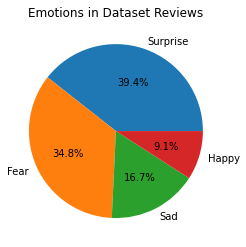

In [10]:
#Change data format
df['Emotion'].value_counts().plot(kind='pie',ylabel="",title="Emotions in Dataset Reviews",autopct='%.1f%%')
    

In [11]:
#Count Fear and being comparative
ocurrences=((df[' Is_Comparative? (Our Algorithm)']==1)&(df[' Is_Comparative? (Stanford Algorithm)']==1)&
            (df[' Is_Comparative? (Human Annotations)']==1)&(df['Emotion']=='Fear')).sum()
ocurrences1=((df[' Is_Comparative? (Our Algorithm)']==1)&(df[' Is_Comparative? (Stanford Algorithm)']==1)
            &(df['Emotion']=='Fear')).sum()
ocurrences2=((df[' Is_Comparative? (Our Algorithm)']==1)&(df[' Is_Comparative? (Human Annotations)']==1)
            &(df['Emotion']=='Fear')).sum()


In [12]:
print(ocurrences)
print(ocurrences1)
print(ocurrences2)

1
1
2
